<a href="https://colab.research.google.com/github/encinas88/Stock-Prediction/blob/master/dnrStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import datetime


import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor

In [348]:
stock_name = 'DNR'
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 9, 6)

yf.pdr_override()
df_full = pdr.get_data_yahoo("DNR", start="2019-1-1", end='2019-9-6').reset_index()
df_full.to_csv('DNR.csv',index=False)
df_full.head()

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,1.65,1.98,1.62,1.96,1.96,18831700
1,2019-01-03,1.97,2.08,1.83,1.97,1.97,17295100
2,2019-01-04,2.10,2.20,2.05,2.19,2.19,17193600
3,2019-01-07,2.28,2.29,2.15,2.20,2.20,17129900
4,2019-01-08,2.27,2.28,2.13,2.19,2.19,16171500


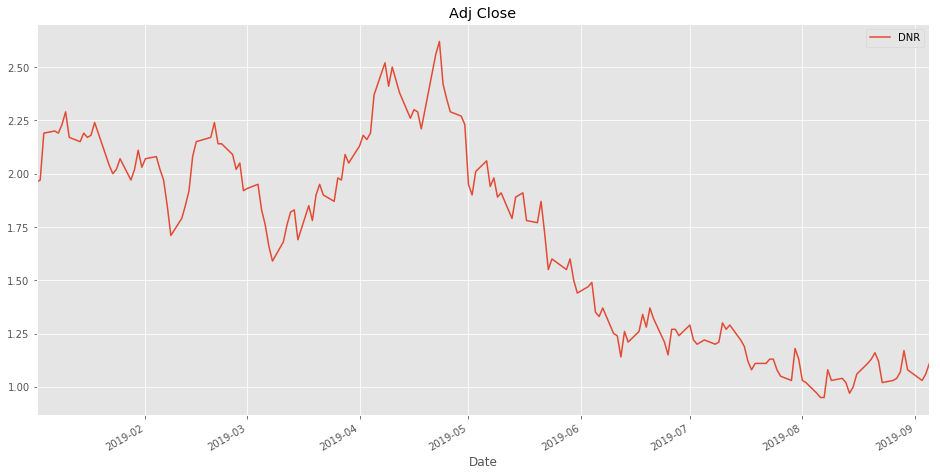

In [349]:
df_full.set_index('Date', inplace=True)
df_raw = df_full[df_full.columns[-2]]  #marks ADJ
df_raw.plot(label=stock_name, figsize=(16,8), title=df_full.columns[-2], grid=True, legend=True) 
#marks ADj

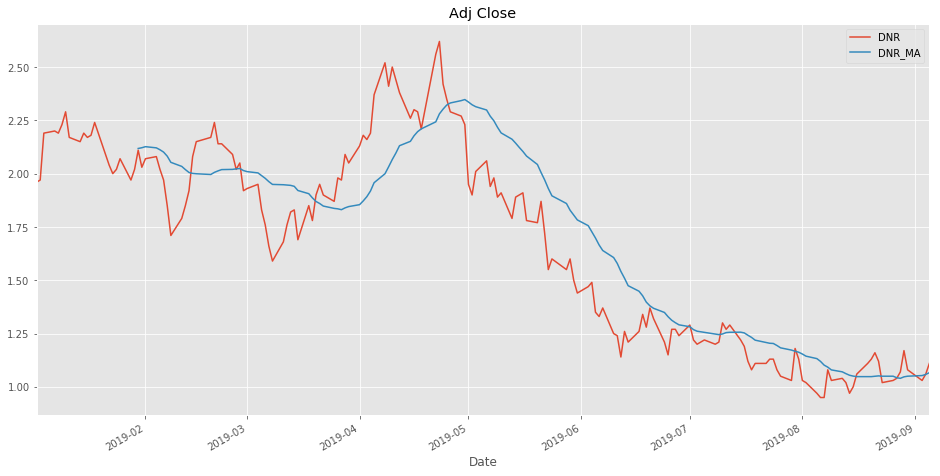

In [350]:
window = 20
df_MA = df_full[df_full.columns[-2]].rolling(window).mean()
df_raw.plot(label=stock_name, figsize=(16,8), title=df_full.columns[-2], grid=True, legend=True)
df_MA.plot(label=stock_name+'_MA', figsize=(16,8), title=df_full.columns[-2], grid=True, legend=True)

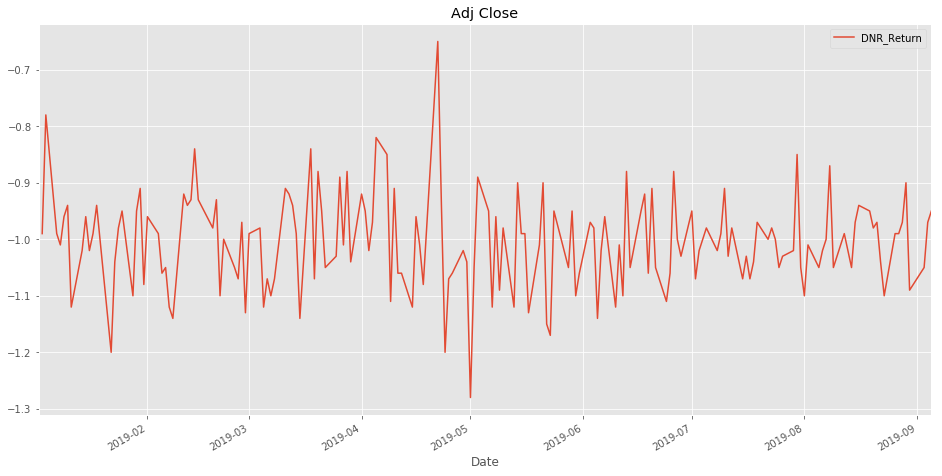

In [351]:
df_ret = df_full[df_full.columns[-2]] - df_full[df_full.columns[-2]].shift(1) - 1
df_ret.plot(label=stock_name+'_Return', figsize=(16,8), title=df_full.columns[-2], grid=True, legend=True)

In [0]:
X = df_full.iloc[:,:-2].to_numpy() 
y = df_full.iloc[:,-2].to_numpy() 

num_data = df_full.shape[0]
split_ratio = 0.8
ind_split = int(split_ratio * num_data)

X_train = X[:ind_split]
y_train = y[:ind_split].reshape(-1,1)
X_test = X[ind_split:]
y_test = y[ind_split:].reshape(-1,1)

split_time = df_full.index[ind_split]

Training RMSE is: 0.000000
Testing RMSE is: 0.000000


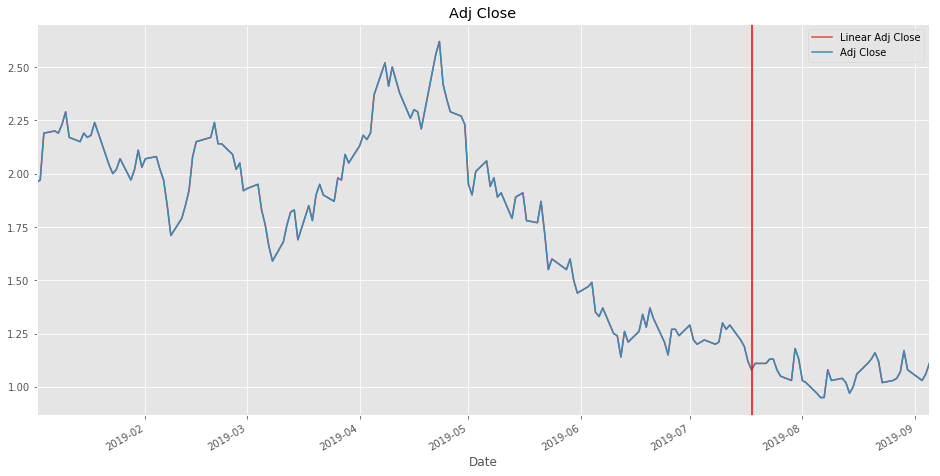

In [353]:
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)

trainings = reg_linear.predict(X_train).reshape(-1,1)
predictions = reg_linear.predict(X_test).reshape(-1,1)

all_pred = np.concatenate((trainings, predictions), axis=0)

df_linear = pd.DataFrame(all_pred, columns=['Linear '+df_full.columns[-2]], index=df_full.index)
df_linear[df_full.columns[-2]] = y

df_linear.plot(label=stock_name+'_Linear', figsize=(16,8), title=df_full.columns[-2], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse = pd.DataFrame([train_rmse, test_rmse], columns=['Linear'], index=['training', 'testing'])

Training RMSE is: 0.022998
Testing RMSE is: 0.014065


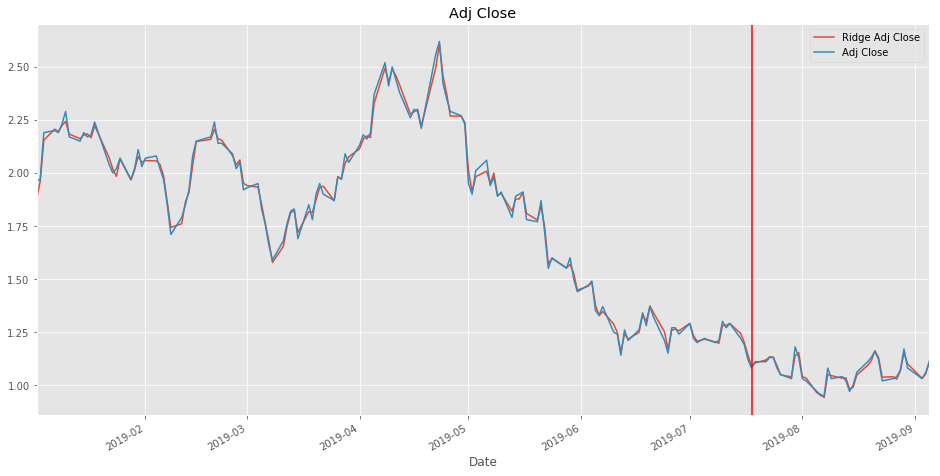

In [354]:
reg_ridge = Ridge(alpha=.5)
reg_ridge.fit(X_train, y_train)


trainings = reg_ridge.predict(X_train).reshape(-1,1)
predictions = reg_ridge.predict(X_test).reshape(-1,1)

all_pred = np.concatenate((trainings, predictions), axis=0)

df_ridge = pd.DataFrame(all_pred, columns=['Ridge '+df_full.columns[-2]], index=df_full.index)
df_ridge[df_full.columns[-2]] = y

df_ridge.plot(label=stock_name+'_Ridge', figsize=(16,8), title=df_full.columns[-2], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse['Ridge'] = [train_rmse, test_rmse]

Training RMSE is: 0.260299
Testing RMSE is: 0.528500


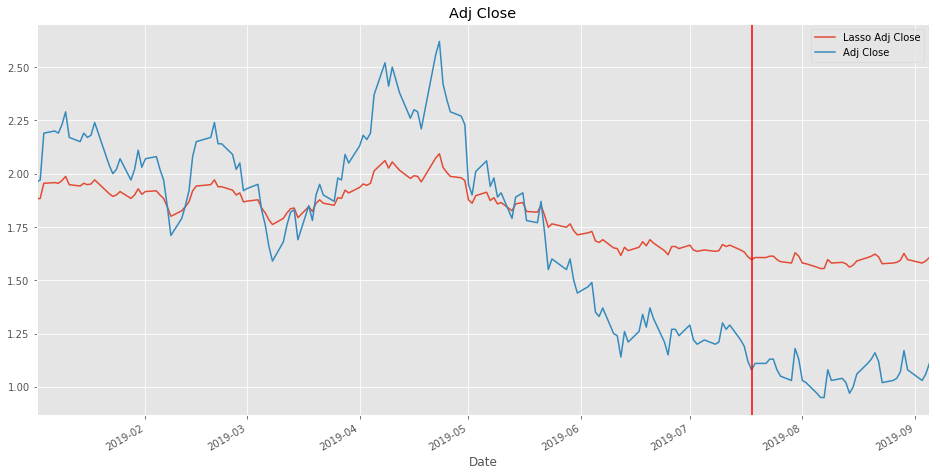

In [355]:
reg_lasso = Lasso(alpha=0.1)
reg_lasso.fit(X_train, y_train)

trainings = reg_lasso.predict(X_train).reshape(-1,1)
predictions = reg_lasso.predict(X_test).reshape(-1,1)

all_pred = np.concatenate((trainings, predictions), axis=0)

df_lasso = pd.DataFrame(all_pred, columns=['Lasso '+df_full.columns[-2]], index=df_full.index)
df_lasso[df_full.columns[-2]] = y

df_lasso.plot(label=stock_name+'_Lasso', figsize=(16,8), title=df_full.columns[-2], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse['Lasso'] = [train_rmse, test_rmse]

Training RMSE is: 0.023263
Testing RMSE is: 0.107842


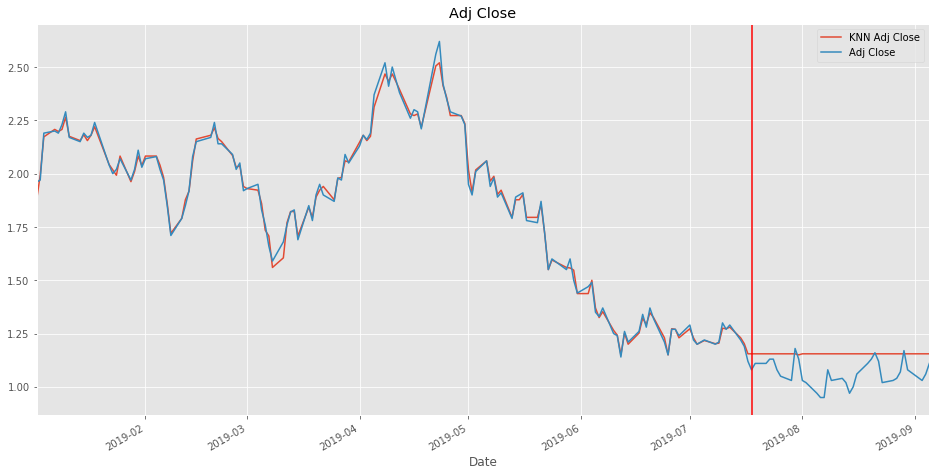

In [356]:
reg_knn = KNeighborsRegressor(n_neighbors=4)
reg_knn.fit(X_train, y_train)

trainings = reg_knn.predict(X_train).reshape(-1,1)
predictions = reg_knn.predict(X_test).reshape(-1,1)

all_pred = np.concatenate((trainings, predictions), axis=0)

df_knn = pd.DataFrame(all_pred, columns=['KNN '+df_full.columns[-2]], index=df_full.index)
df_knn[df_full.columns[-2]] = y

df_knn.plot(label=stock_name+'_KNN', figsize=(16,8), title=df_full.columns[-2], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse['KNN'] = [train_rmse, test_rmse]

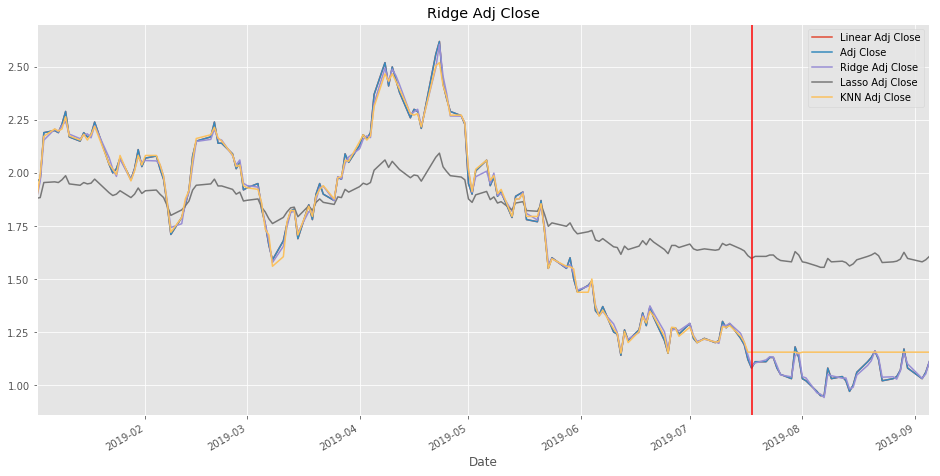

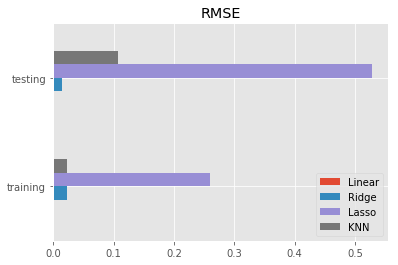

In [358]:
df_all = df_linear
df_all[df_ridge.columns[0]] = df_ridge[df_ridge.columns[0]]
df_all[df_lasso.columns[0]] = df_lasso[df_lasso.columns[0]]
df_all[df_knn.columns[0]] = df_knn[df_knn.columns[0]]

df_all.plot(label=stock_name, figsize=(16,8), title=df_all.columns[2], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

df_rmse.plot(kind='barh', title='RMSE')

Ridge Regression is has the lowerst RMSE from all the models.